In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data12 = pd.read_csv('~/Documents/dsi/capstone/capstone1/data/2012/2012_data.csv')

In [3]:
df12 = data12.groupby(['RACE_GROUP_TTL', 'ETH_GROUP_TTL','SEX_TTL']).agg({'FIRMALL':'sum'})
df12.rename(columns={'FIRMALL':'count'},inplace=True)

In [4]:
df12.drop(index='Meaning of Race code',inplace=True)

In [5]:
df12['count'] = pd.to_numeric(df12['count'])

Hypothesis Test on certain factors


In [6]:
df12['percent'] = 100 * (df12['count'] / df12.iloc[0,0])

In [7]:
percent12 = df12.sort_values('percent',ascending=False)

In [8]:
consolidate12 = percent12[1:].drop(index='All firms',level=0)
consolidate12 = consolidate12[1:].drop(index='All firms',level=1)

In [9]:
race12 = consolidate12.groupby(level=0).agg({'percent':'sum'})
race12.sort_values('percent',ascending=False,inplace=True)
race12.reset_index(inplace=True)
race12.rename(columns={'RACE_GROUP_TTL':'race'},inplace=True)
race12

,race,percent
0,White,85.284708
1,Asian,7.104229
2,Black or African American,5.308209
3,Some other race,1.735664
4,American Indian and Alaska Native,0.794329
5,Native Hawaiian and Other Pacific Islander,0.161395


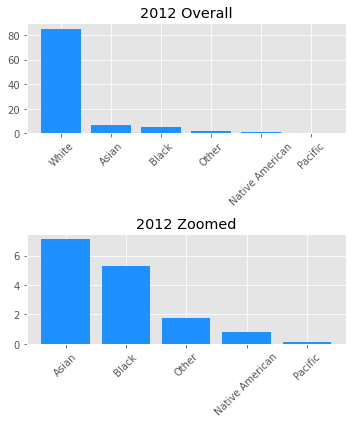

In [22]:
zoom_race12 = race12[race12['race'] != 'White']
x = np.arange(len(race12['race']))
x2 = np.arange(len(zoom_race12['race']))
xlist = ['White','Asian','Black', 'Other', 'Native American', 'Pacific']
fig, ax = plt.subplots(2,1,figsize=(5,6))

ax[0].bar(x, race12['percent'], color='dodgerblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(xlist);

plt.setp(ax[0].get_xticklabels(), rotation=45);

ax[1].bar(x2, zoom_race12['percent'], color='dodgerblue')
ax[1].set_xticks(x2)
ax[1].set_xticklabels(xlist[1:]);

plt.setp(ax[1].get_xticklabels(), rotation=45);

ax[0].set_title("2012 Overall");
ax[1].set_title("2012 Zoomed");
fig.tight_layout()
plt.savefig('2012_racez.png')

In [12]:
eth12 = percent12[1:].drop(index='All firms',level=1)
eth12.reset_index(inplace=True)
eth12 = eth12[eth12['RACE_GROUP_TTL'] == 'All firms']
eth12 = eth12[eth12['SEX_TTL'] == 'All firms']
eth12 = eth12[eth12['ETH_GROUP_TTL'].isin(['Non-Hispanic', 'Hispanic'])]
eth12 = eth12.drop(columns=['RACE_GROUP_TTL','SEX_TTL','count']).rename(columns={'ETH_GROUP_TTL':'ethnicity'})
eth12

,ethnicity,percent
1,Non-Hispanic,91.624054
5,Hispanic,7.132624


In [13]:
sex12 = percent12[1:].drop(index='All firms',level=2)
sex12 = sex12.loc[('All firms','All firms')]
sex12 = sex12[1:].drop(columns='count')
sex12.reset_index(inplace=True)
sex12.rename(columns={'SEX_TTL':'sex'},inplace=True)
sex12

<ipython-input-13-a20605f0e919>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  sex12 = sex12.loc[('All firms','All firms')]


,sex,percent
0,Male-owned,58.002277
1,Female-owned,34.232600
2,Equally male-/female-owned,6.999394
3,Publicly held and other firms not classifiable...,0.765729
